In [10]:
import math

## FIND EQUATION OF LINE GIVEN TWO POINTS
# PARAMETERS: the start and end point
# RETURN: the standard form coefficients for a straight line between the two points
# USED TO FIND THE TARGET LINE FOR A SPECIFIC REACH
def findEquationOfLine(startPoint, endPoint):
    x = (startPoint[0], endPoint[0]) # x value of the starting and ending point of the trajectory
    y = (startPoint[1], endPoint[1]) # y value of the starting and ending point of the trajectory
    slopeInterceptCoefficients = np.polyfit(x, y, 1) #fits a polynomial of degree 1 (linear) to the points
    # returns y = ax + c; therefore, ax -y + c = 0; so b = -1
    a = slopeInterceptCoefficients[0]
    b = -1
    c = slopeInterceptCoefficients[1]
    standardCoefficients = [a, b, c]
    return standardCoefficients

## FIND THE DEVIATION OF A CURVE FROM A STRAIGHT LINE FOR A LIST OF TRAJECTORIESS
# 
def findDeviationFromStraightLine(targetsArr, resultsArr):
    listDeviations = []
    for i in range(len(resultsArr[:,0,0])):
        # find the target straight line equation
        currStartPoint = targetsArr[i,0,0:2]
        currEndPoint = targetsArr[i,-1,0:2]
        standardCoefficients = findEquationOfLine(currStartPoint, currEndPoint)
        a = standardCoefficients[0]
        b = standardCoefficients[1]
        c = standardCoefficients[2]

        # find the trajectory of the current reach
        currReach = resultsArr[i, :, 0:2]

        # find how far each point in the trajectory 
        currDeviationArr = []
        for j in range(len(currReach[:,0])):
            x1 = currReach[j,0]
            y1 = currReach[j, 1]

            #equation of a line is ax + by + c = 0
            currDist = (abs(a*x1 + b*y1 + c)) / math.sqrt(a*a + b*b)
            currDeviationArr.append(currDist)

        listDeviations.append(currDeviationArr)
    return listDeviations

In [11]:
## OPENING THE CURRENT PARTICIPANT'S DATA
import numpy as np

def openAllFilesForParticipant(trialNumber):
    endOfFileName = "_" + str(trialNumber) + ".npy"
    resultsNF1 = np.load("save_NF1/cartesian_position" + endOfFileName)
    targetsNF1 = np.load("save_NF1/targets" + endOfFileName)

    resultsCF1 = np.load("save_CF1/cartesian_position" + endOfFileName)
    targetsCF1 = np.load("save_CF1/targets" + endOfFileName)

    resultsNF2 = np.load("save_NF2/cartesian_position" + endOfFileName)
    targetsNF2 = np.load("save_NF2/targets" + endOfFileName)

    resultsCF2 = np.load("save_CF2/cartesian_position" + endOfFileName)
    targetsCF2 = np.load("save_CF2/targets" + endOfFileName)

    return resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2

In [24]:
## visualize the curves per participant
import matplotlib.pyplot as plt

def plotCurvesForParticipant(participantNumber, resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2 ):
    plt.figure(figsize=(14, 2.5)).set_tight_layout(True)

    target_xy = targetsNF1 
    xy = resultsNF1[-8:,:,:] ####
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]    
    plt.subplot(141)
    plt.scatter(target_x, target_y)
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)
    for i in range(8):
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
    plt.xlabel('NF1')

    target_xy = targetsCF1 
    xy = resultsCF1[-8:,:,:] ####
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]    
    plt.subplot(142)
    plt.scatter(target_x, target_y)
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)
    for i in range(8):
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
    plt.xlabel('CF1')

    target_xy = targetsNF2 
    xy = resultsNF2[-8:,:,:] ####
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]    
    plt.subplot(143)
    plt.scatter(target_x, target_y)
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)
    for i in range(8):
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
    plt.xlabel('NF2')

    target_xy = targetsCF2 
    xy = resultsCF2[-8:,:,:] ####
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]    
    plt.subplot(144)
    plt.scatter(target_x, target_y)
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)
    for i in range(8):
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
    plt.xlabel('CF2')

    plt.suptitle("Participant # " + str(participantNumber))



In [25]:
def findMaxDeviationsForParticipant(deviationsNF1, deviationsCF1, deviationsNF2, deviationsCF2):
    listMaxNF1 = []
    for i in range(len(deviationsNF1)):
        listMaxNF1.append(max(deviationsNF1[i]))

    listMaxCF1 = []
    for i in range(len(deviationsCF1)):
        listMaxCF1.append(max(deviationsCF1[i]))

    listMaxNF2 = []
    for i in range(len(deviationsNF2)):
        listMaxNF2.append(max(deviationsNF2[i]))

    listMaxCF2 = []
    for i in range(len(deviationsCF2)):
        listMaxCF2.append(max(deviationsCF2[i]))

    return listMaxNF1, listMaxCF1, listMaxNF2, listMaxCF2

    
    


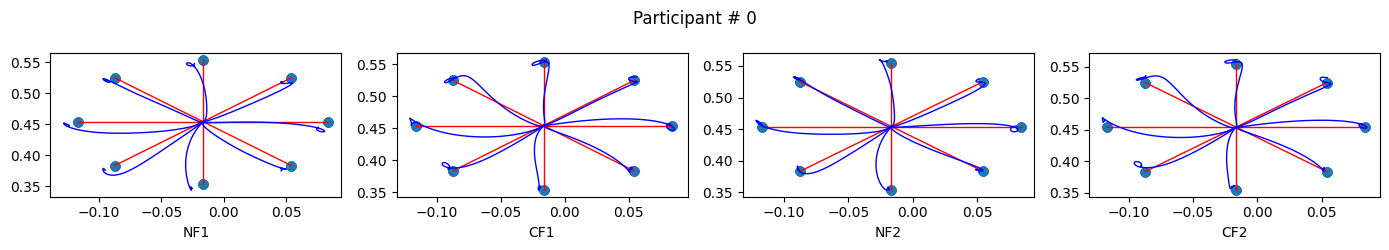

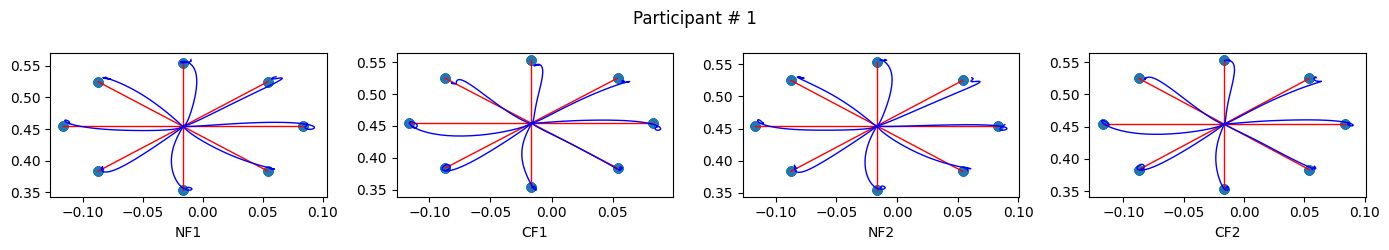

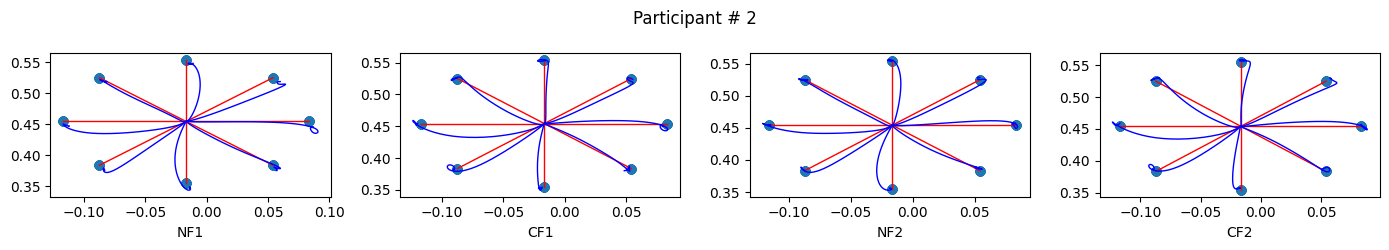

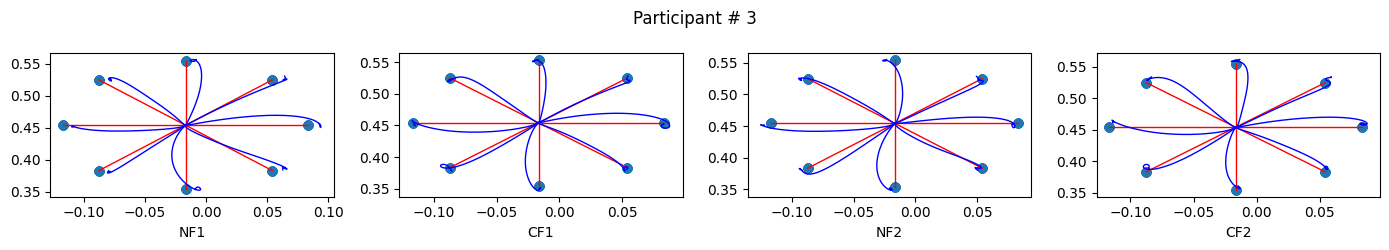

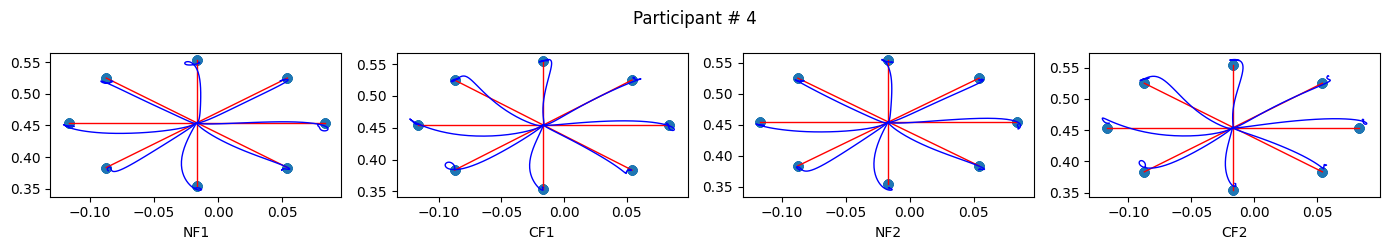

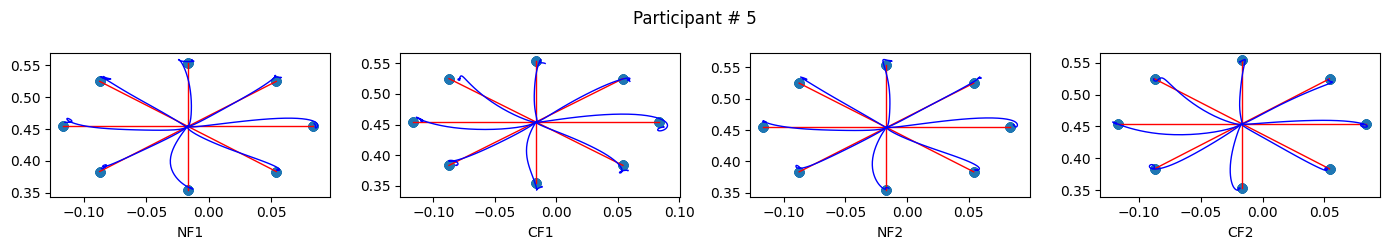

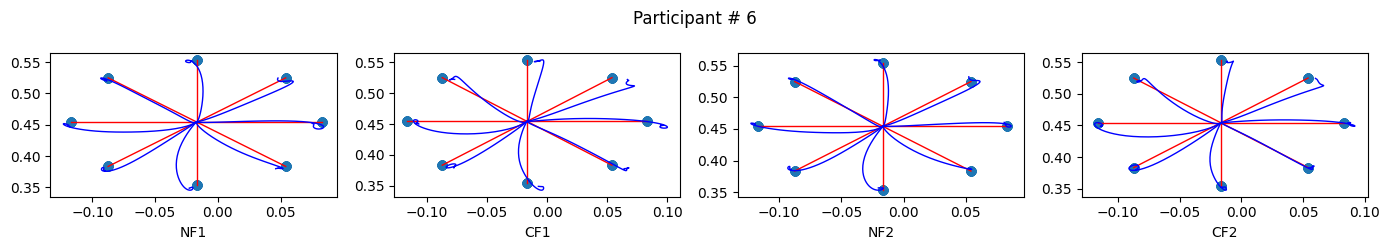

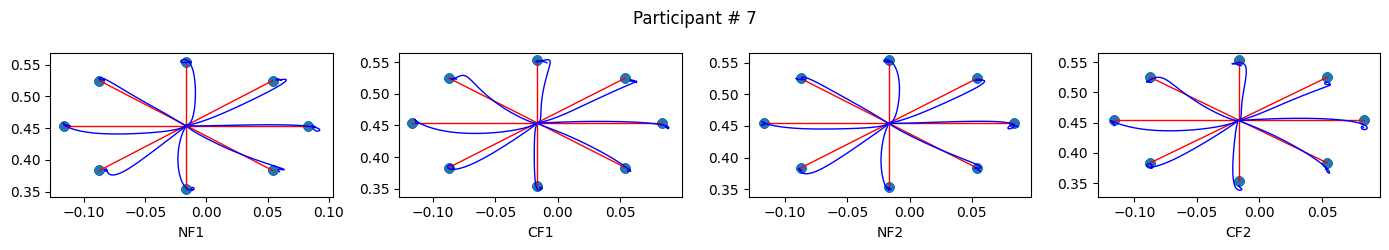

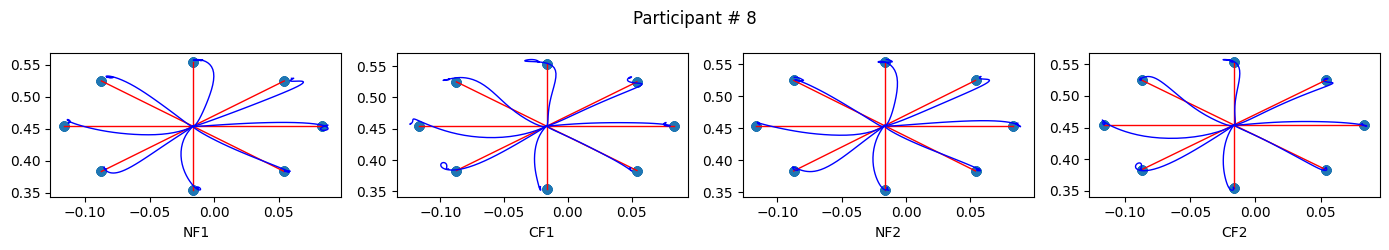

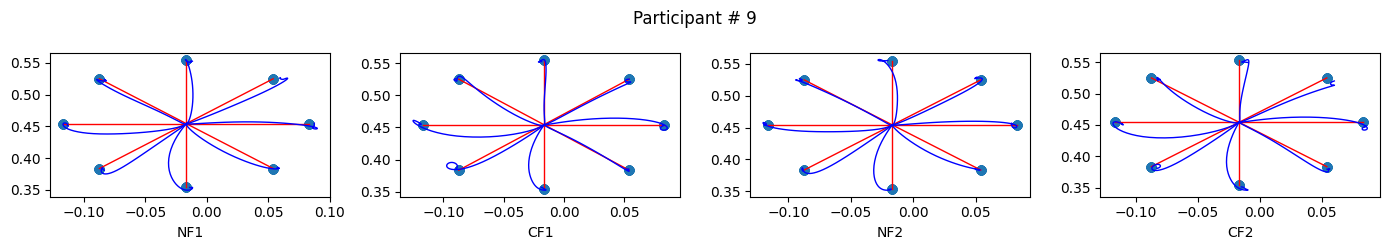

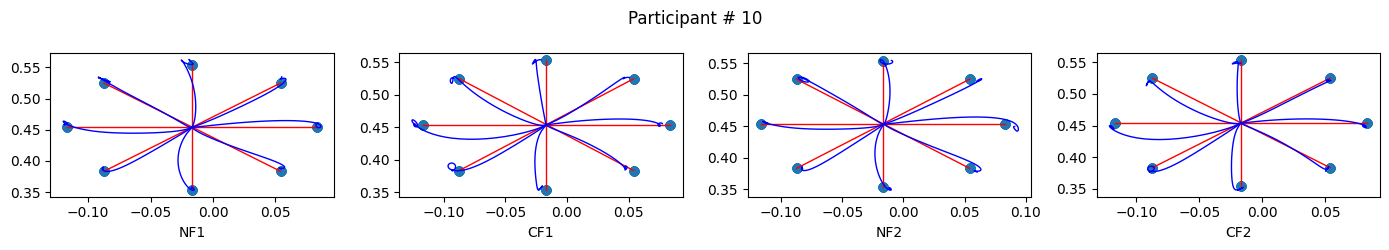

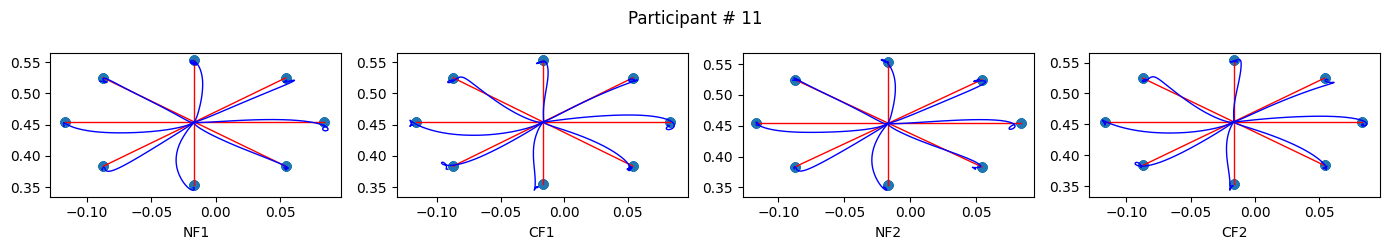

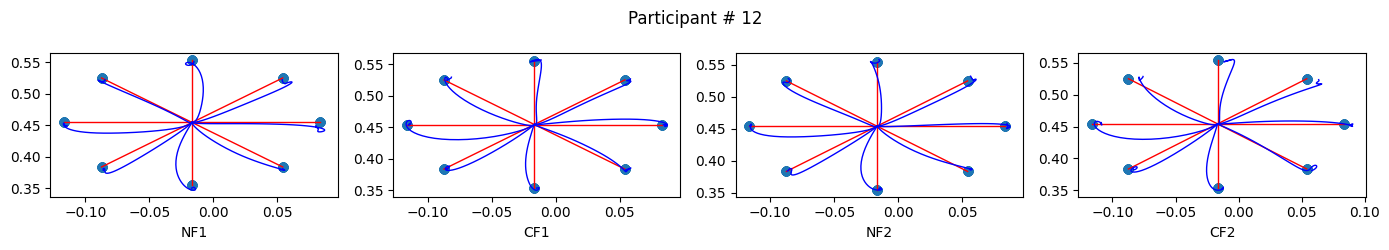

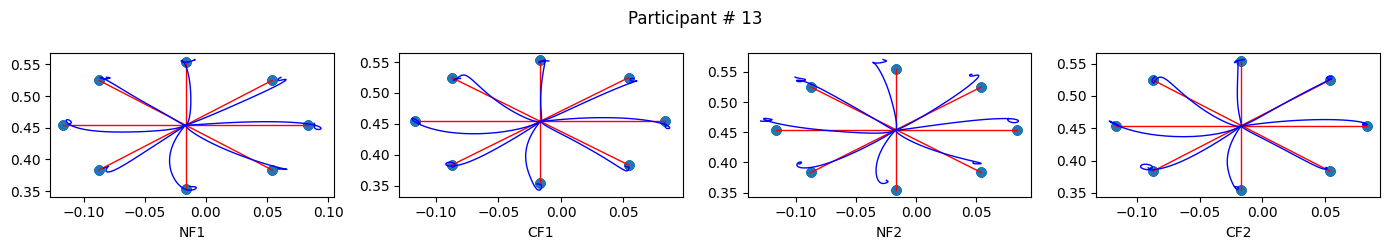

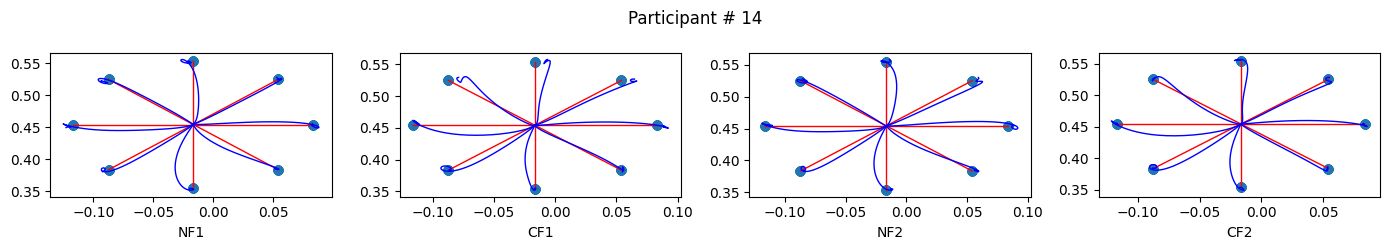

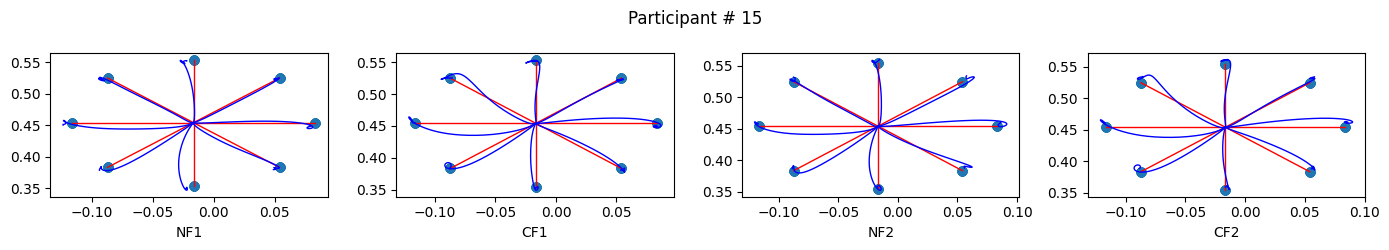

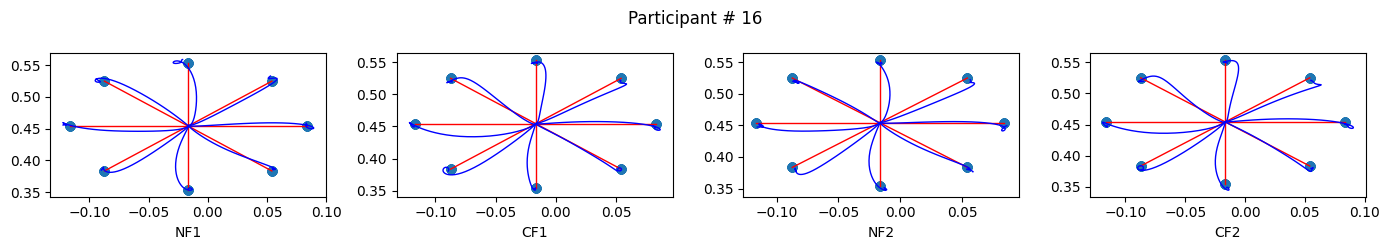

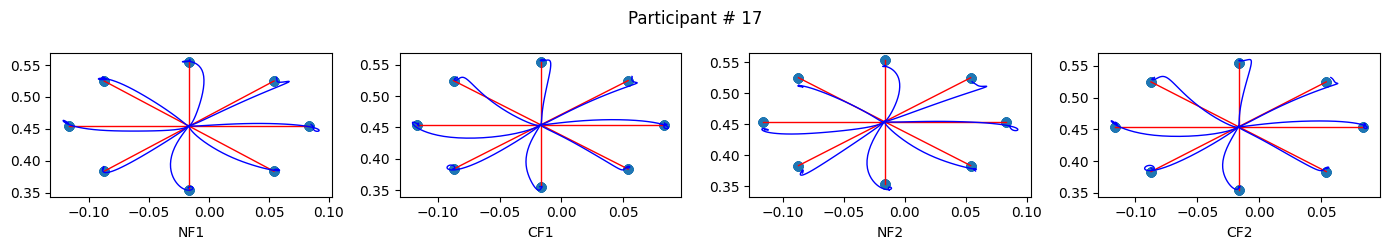

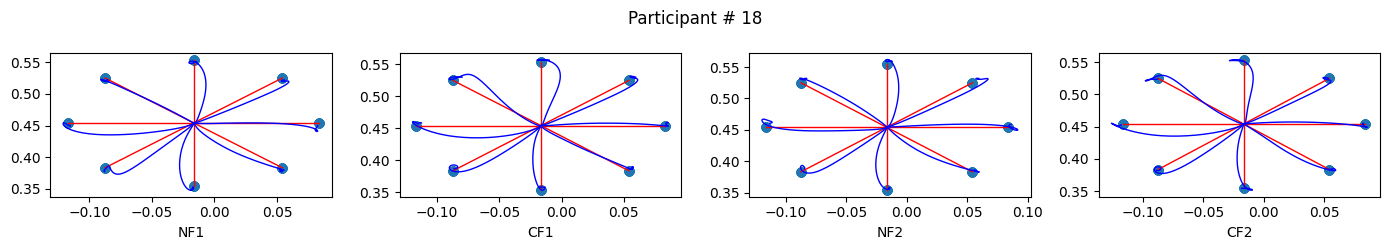

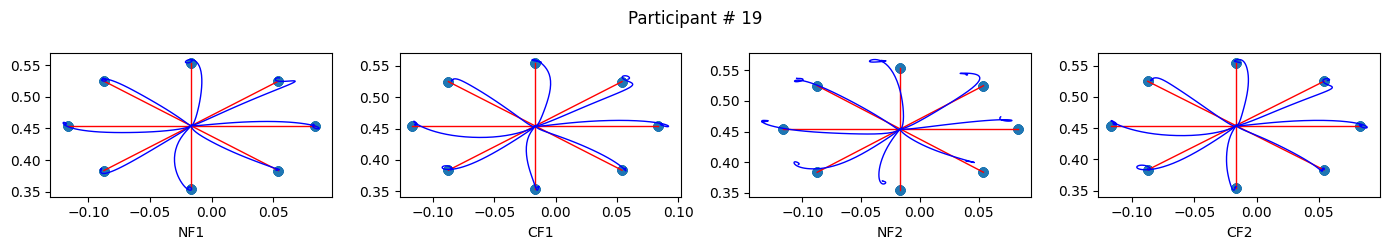

In [26]:
maxNF1 = []
maxCF1 = []
maxNF2 = []
maxCF2 = []

for i in range(20):
    resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2 = openAllFilesForParticipant(i)
    plotCurvesForParticipant(i, resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2 )
    
    deviationsNF1 = findDeviationFromStraightLine(targetsNF1, resultsNF1)
    deviationsCF1 = findDeviationFromStraightLine(targetsCF1, resultsCF1)
    deviationsNF2 = findDeviationFromStraightLine(targetsNF2, resultsNF2)
    deviationsCF2 = findDeviationFromStraightLine(targetsCF2, resultsCF2)

    listMaxNF1, listMaxCF1, listMaxNF2, listMaxCF2 = findMaxDeviationsForParticipant(deviationsNF1, deviationsCF1, deviationsNF2, deviationsCF2)

    if (len(maxNF1) == 0):
        maxNF1 = listMaxNF1
    else:
        maxNF1 = np.vstack((maxNF1, listMaxNF1))

    if (len(maxCF1) == 0):
        maxCF1 = listMaxCF1
    else:
        maxCF1 = np.vstack((maxCF1, listMaxCF1))

    if (len(maxNF2) == 0):
        maxNF2 = listMaxNF2
    else:
        maxNF2 = np.vstack((maxNF2, listMaxNF2))

    if (len(maxCF2) == 0):
        maxCF2 = listMaxCF2
    else:
        maxCF2 = np.vstack((maxCF2, listMaxCF2))

In [7]:
#print(maxCF1[1, :])
np.save("postAnalysis/maxNF1", maxNF1)
np.save("postAnalysis/maxCF1", maxCF1)
np.save("postAnalysis/maxNF2", maxNF2)
np.save("postAnalysis/maxCF2", maxCF2)

/tmp/ipykernel_2980777/4177514639.py:5: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-t * x) + b
/home/shruthi/thesis/env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


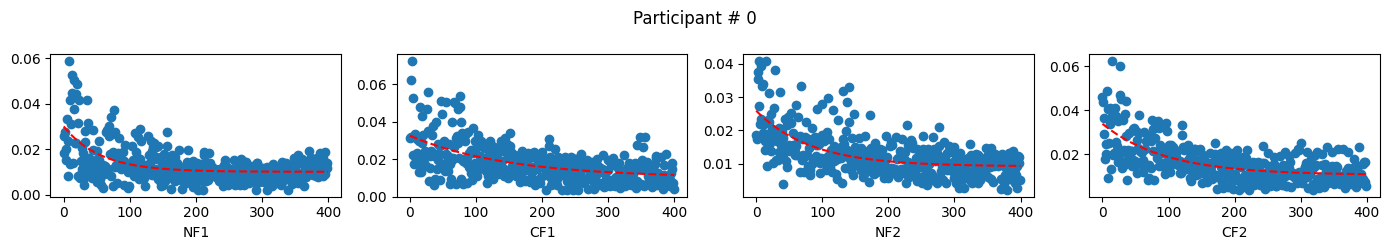

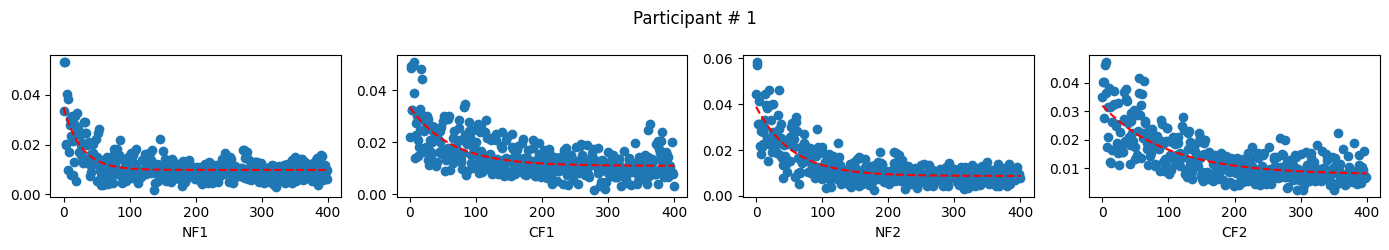

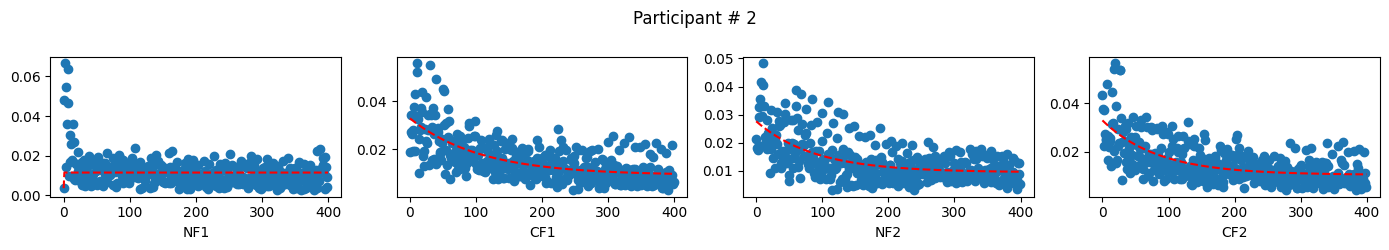

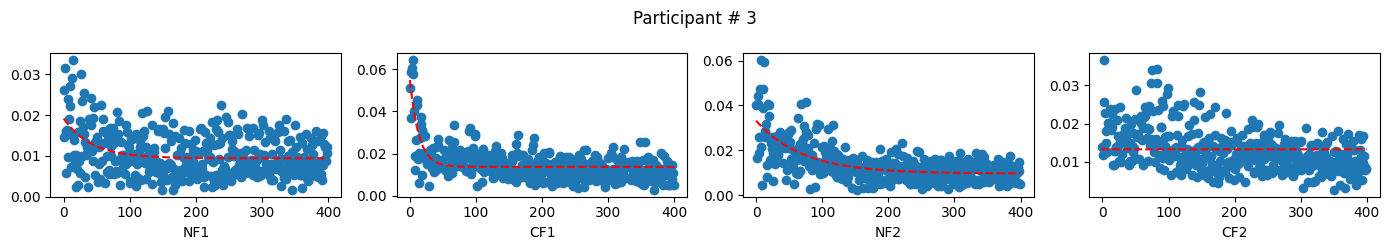

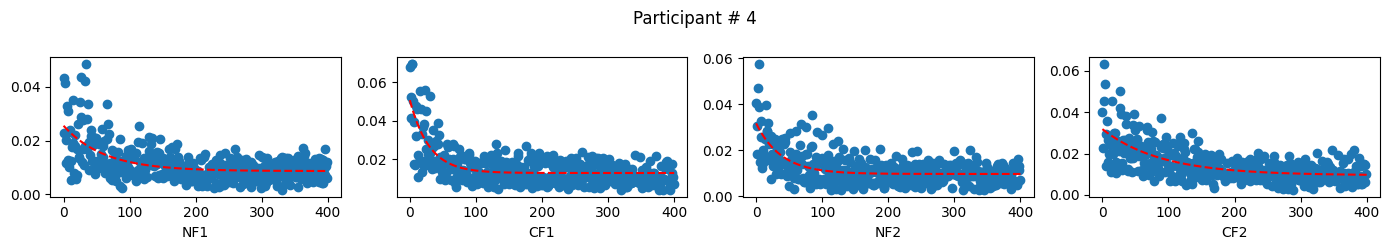

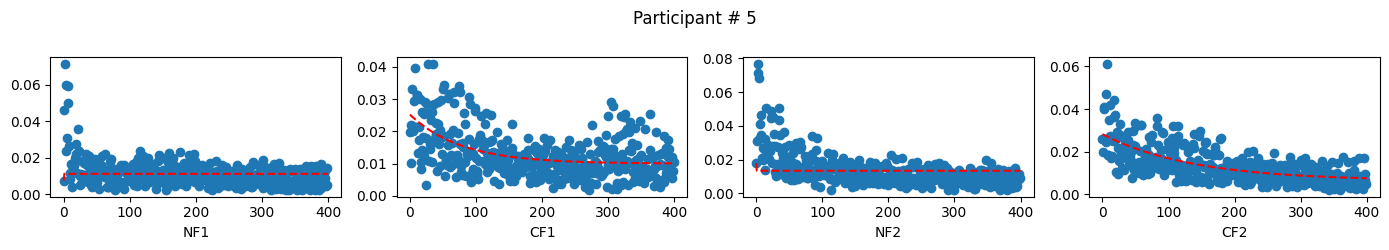

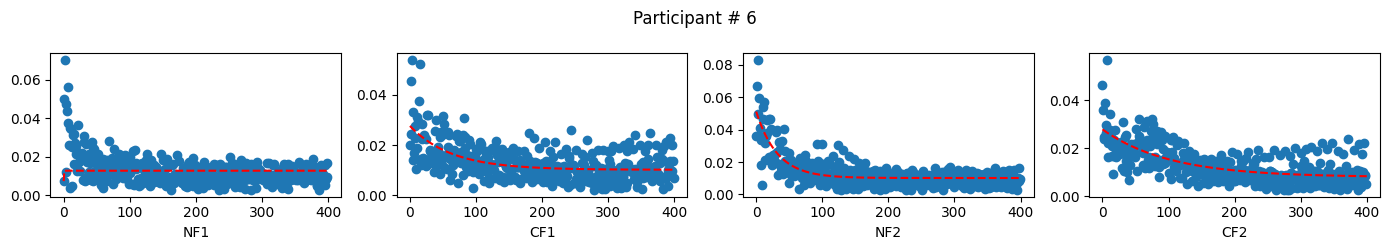

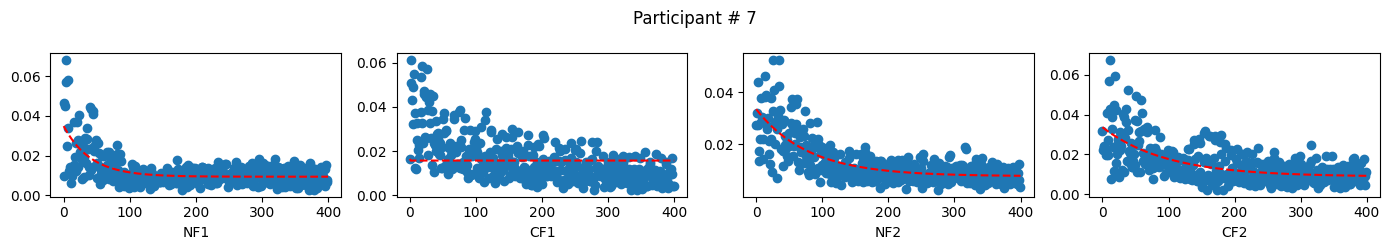

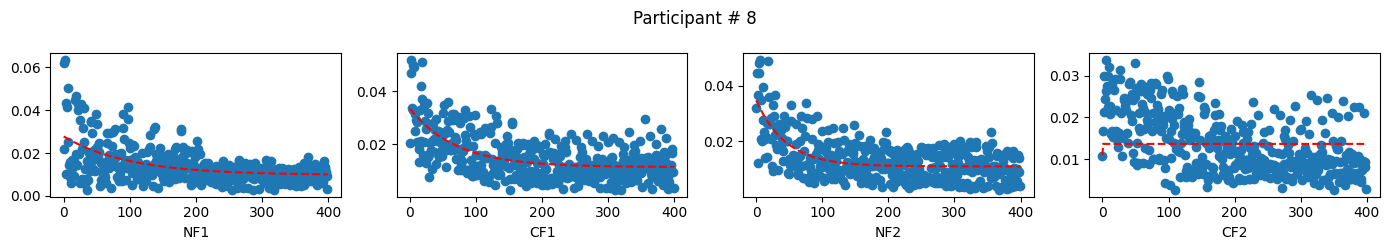

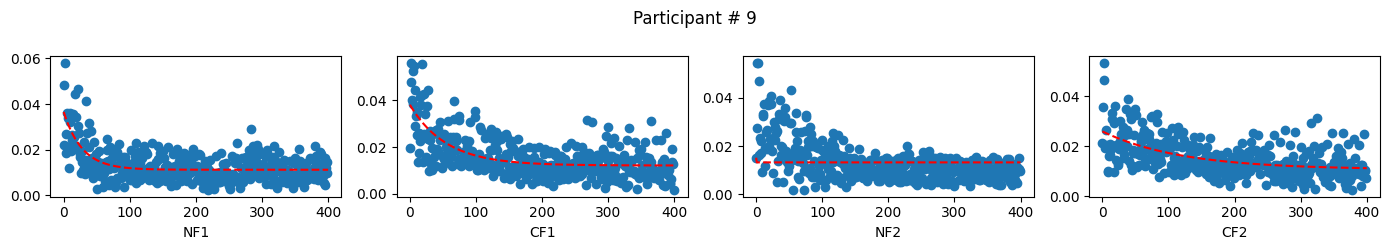

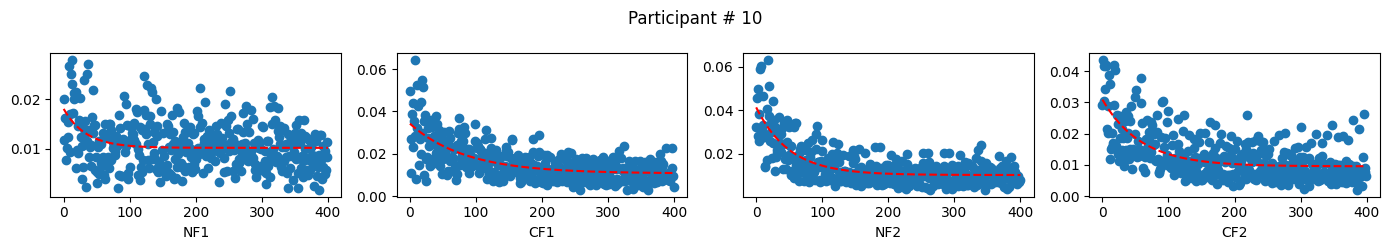

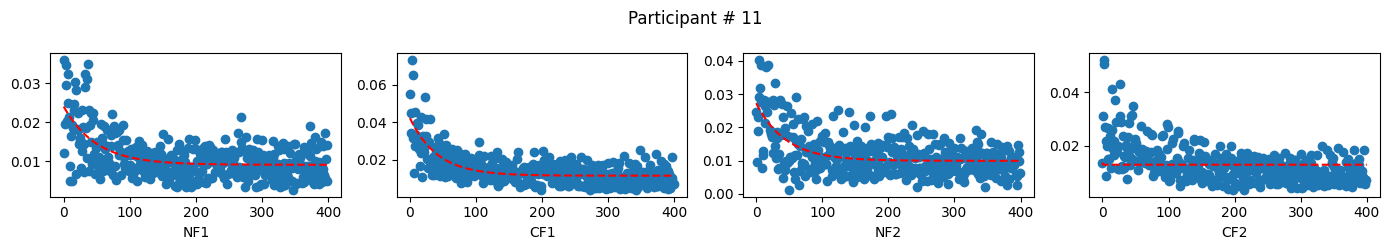

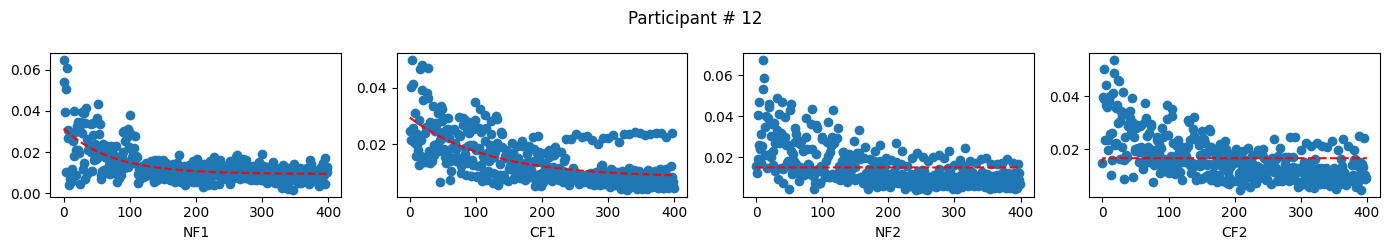

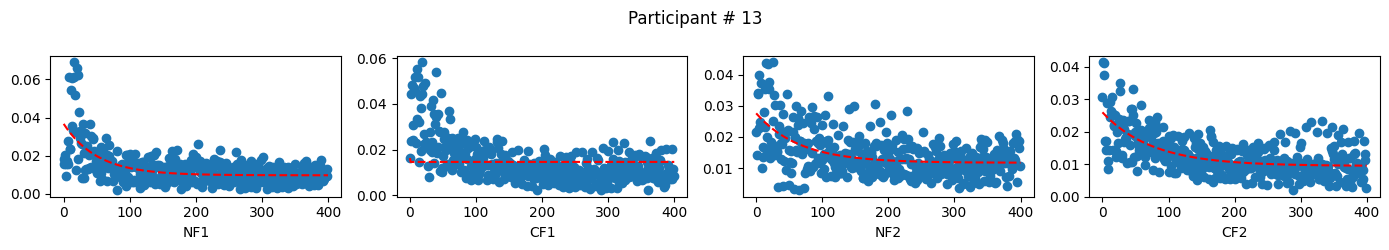

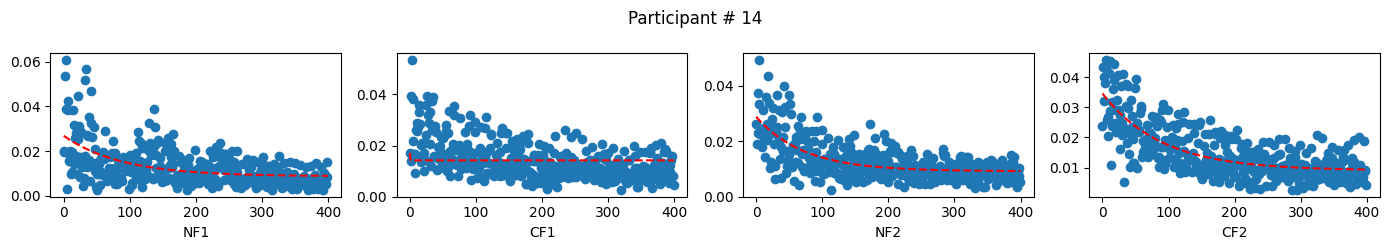

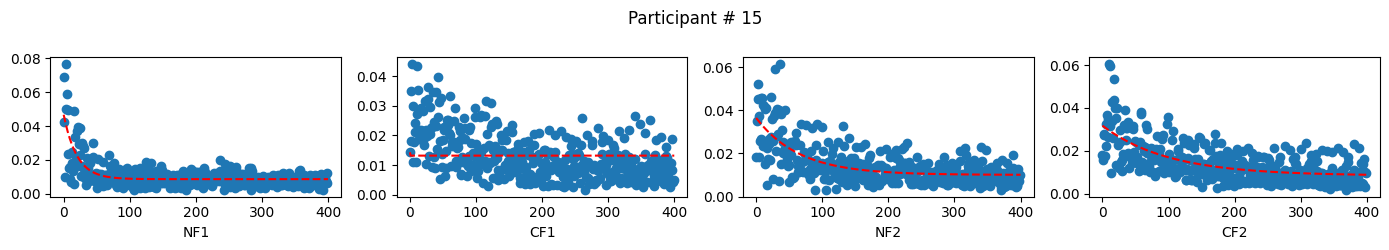

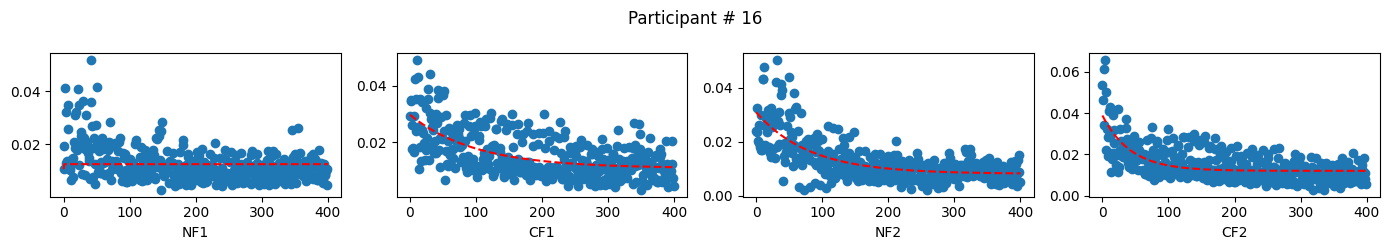

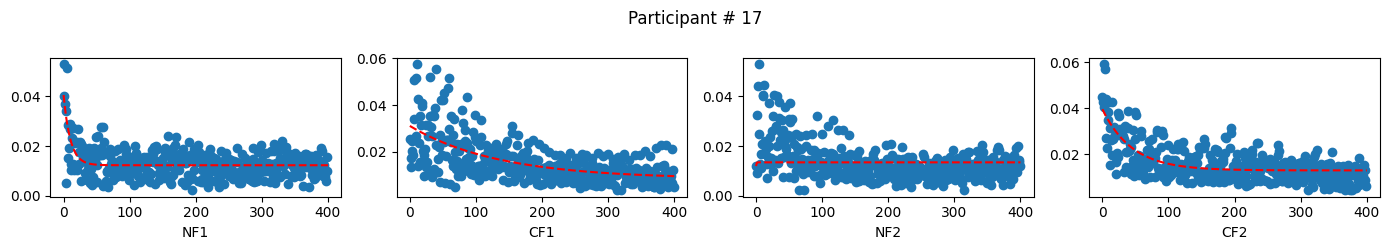

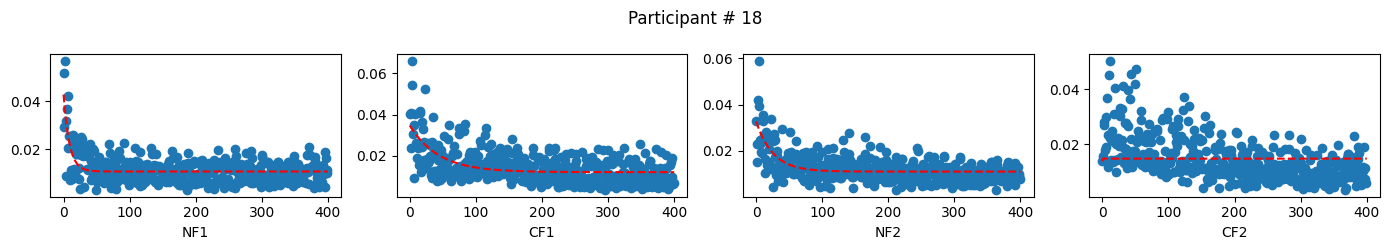

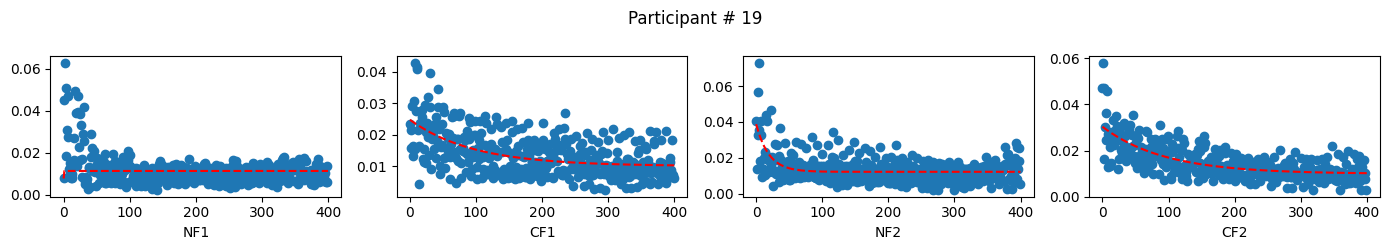

In [6]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

for i in range(20):
    currMaxNF1, currMaxCF1, currMaxNF2, currMaxCF2 = maxNF1[i], maxCF1[i], maxNF2[i], maxCF2[i]

    # PLOTTING MAX
    plt.figure(figsize=(14, 2.5)).set_tight_layout(True)

    plt.subplot(141)
    plt.scatter(range(len(currMaxNF1)), currMaxNF1)
    model2 = np.poly1d(np.polyfit(range(len(currMaxNF1)), currMaxNF1, 2))
    polyline = np.linspace(0, len(currMaxNF1), len(currMaxNF1))
    #plt.plot(polyline, model2(polyline), color='red')
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF1)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "--", color="red")
    plt.xlabel('NF1')

    plt.subplot(142)
    plt.scatter(range(len(currMaxCF1)), currMaxCF1)
    model2 = np.poly1d(np.polyfit(range(len(currMaxCF1)), currMaxCF1, 2))
    polyline = np.linspace(0, len(currMaxCF1), len(currMaxCF1))
    #plt.plot(polyline, model2(polyline), color='red')
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF1)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "--", color="red")
    plt.xlabel('CF1')

    plt.subplot(143)
    plt.scatter(range(len(currMaxNF2)), currMaxNF2)
    model2 = np.poly1d(np.polyfit(range(len(currMaxNF2)), currMaxNF2, 2))
    polyline = np.linspace(0, len(currMaxNF2), len(currMaxNF2))
    #plt.plot(polyline, model2(polyline), color='red')
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF2)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "--", color="red")
    plt.xlabel('NF2')

    plt.subplot(144)
    plt.scatter(range(len(currMaxCF2)), currMaxCF2)
    model2 = np.poly1d(np.polyfit(range(len(currMaxCF2)), currMaxCF2, 2))
    polyline = np.linspace(0, len(currMaxCF2), len(currMaxCF2))
    #plt.plot(polyline, model2(polyline), color='red')
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF2)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "--", color="red")
    plt.xlabel('CF2')
    
    plt.suptitle("Participant # " + str(i))

In [ ]:
## visualize the curves per participant
import matplotlib.pyplot as plt
target_xy = targetsCF2 
xy = resultsCF2 ####
target_x = target_xy[:, -1, 0]
target_y = target_xy[:, -1, 1]
nmov,ntime,_ = np.shape(xy)

## resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2 

plt.figure()
for i in range(8):
    plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)

#range(4, len(listMedians), 8)
for i in range(8):
    plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)